In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

from matplotlib.ticker import AutoMinorLocator
import matplotlib.patches as patches

In [10]:
atlas_fpath = "/fast_scratch/QVAE/data/atlas_dataset2and3/dataset_2_1.hdf5"
atlas_data=h5py.File(atlas_fpath,'r')

In [11]:
for a, b in atlas_data.items():
    print(a)

incident_energies
showers


In [12]:
events = np.array(atlas_data["showers"])
energies = np.array(atlas_data["incident_energies"])

In [13]:
print(events.shape)
print(energies.shape)

(100000, 6480)
(100000, 1)


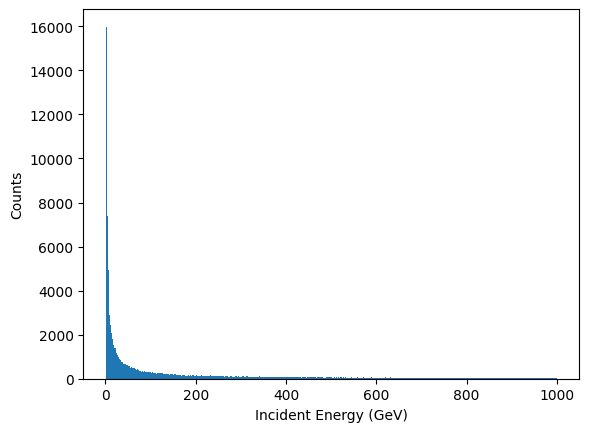

In [14]:
counts = plt.hist(energies / 1000 , log=False, bins=500)
plt.xlabel("Incident Energy (GeV)");
plt.ylabel("Counts");

In [15]:
max_counts = int(counts[0][100])

In [16]:
dict_events = {i:[] for i in range(2, 202, 2)}

In [17]:
for eng, evt in zip(energies, events):
    eng_bin = int(eng / 1000)
    eng_bin += eng_bin % 2
    
    if eng_bin in dict_events and len(dict_events[eng_bin]) < max_counts:
        dict_events[eng_bin].append((eng, evt))
        
    

In [18]:
events = np.array([])
energies = np.array([])

for i in range(2, 202, 2):
    engs_evts = dict_events[i]
    
    new_energies = np.array([engs_evts[j][0][0] for j in range(len(engs_evts))])
    new_events = np.array([engs_evts[j][1] for j in range(len(engs_evts))])
    
    
    energies = np.concatenate((energies, new_energies))
    events = new_events if len(events)==0 else np.concatenate((events, new_events))
    
    

In [19]:
energies = np.expand_dims(energies, -1)
print(events.shape)
print(energies.shape)

idxs = np.arange(energies.shape[0])
np.random.shuffle(idxs)
print(idxs)

events = events[idxs]
energies = energies[idxs]

print(events.shape)
print(energies.shape)

(15924, 6480)
(15924, 1)
[ 7136  7351 13130 ...  6719 14958  2536]
(15924, 6480)
(15924, 1)


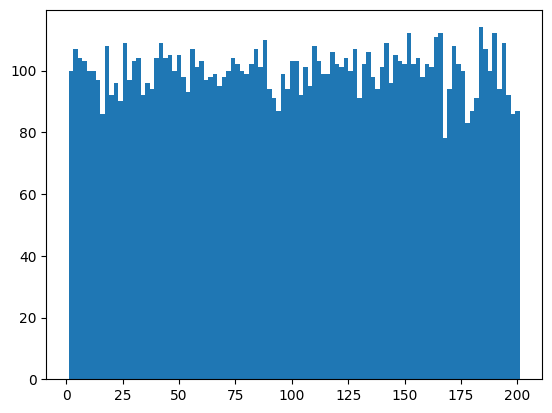

In [20]:
counts = plt.hist(energies[:10000] / 1000 , log=False, bins=100)

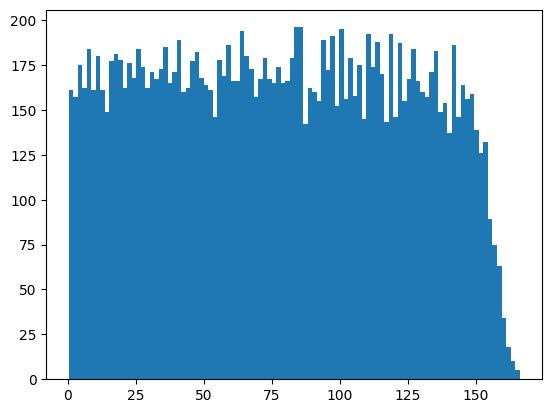

In [21]:
counts = plt.hist(events.sum(axis=1) / 1000 , log=False, bins=100)

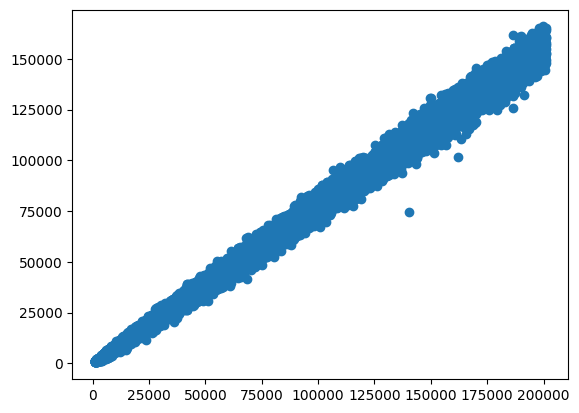

In [22]:
plt.scatter(energies, events.sum(axis=1))

In [26]:
file_path = "/fast_scratch/QVAE/data/atlas_dataset2and3_uniform/dataset_2_1.hdf5"

d = {"showers":events, "incident_energies":energies}

h = h5py.File(file_path, "w")
for k, v in d.items():
    h.create_dataset(k, data=v)

In [27]:
uniform_data=h5py.File(file_path,'r')

In [28]:
events = np.array(uniform_data["showers"])
energies = np.array(uniform_data["incident_energies"])

print(events.shape)
print(energies.shape)

(15924, 6480)
(15924, 1)


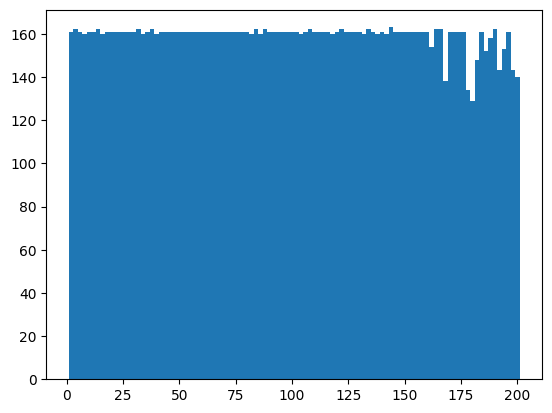

In [29]:
counts = plt.hist(energies / 1000 , log=False, bins=100)

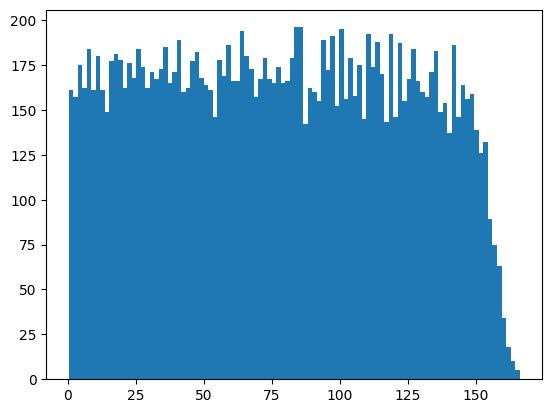

In [30]:
counts = plt.hist(events.sum(axis=1) / 1000 , log=False, bins=100)

In [2]:
file_path = "/fast_scratch/QVAE/data/atlas_dataset2and3_scaled/uniform_dataset_2_1.hdf5"

uniform_scaled_data=h5py.File(file_path,'r')

In [3]:
events = np.array(uniform_scaled_data["showers"])
energies = np.array(uniform_scaled_data["incident_energies"])

In [4]:
print(events.shape)
print(energies.shape)

(15924, 6480)
(15924, 1)


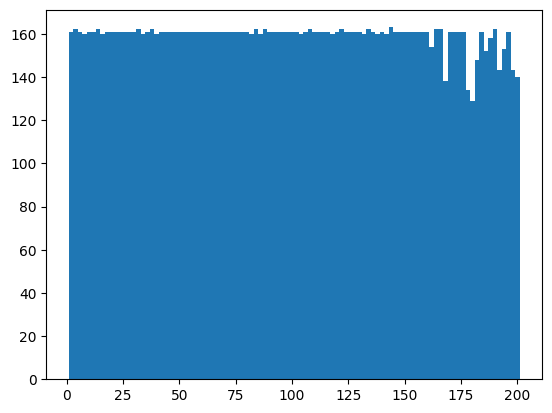

In [5]:
counts = plt.hist(energies / 1000 , log=False, bins=100)

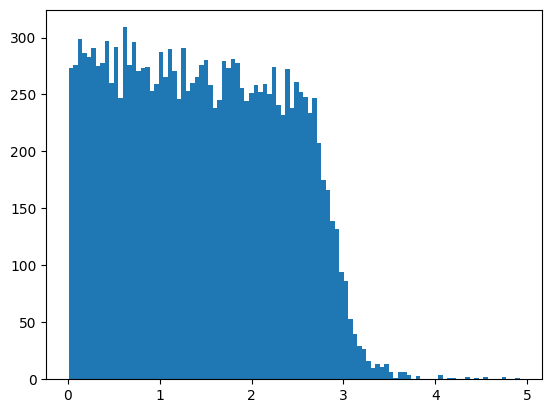

In [6]:
counts = plt.hist(events.sum(axis=1) / 1000 , log=False, bins=100)

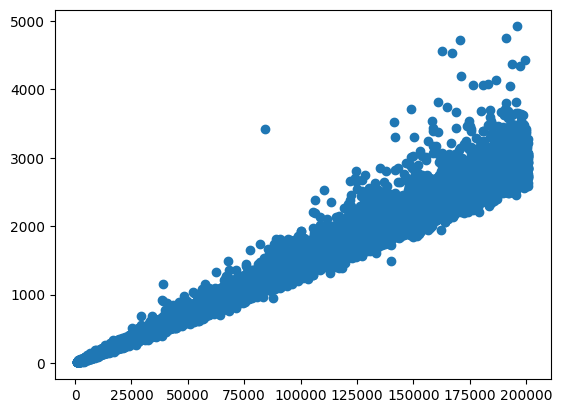

In [7]:
plt.scatter(energies, events.sum(axis=1))